In [15]:
import yaml, os

with open('../../src/parameters/cross-section.yaml', 'r', encoding='utf-8') as f:
    cross_section_baseline = yaml.safe_load(f)['ZpToHG']

# convert pb to fb
cross_section_baseline = {k: v*1e3 for k, v in cross_section_baseline.items()}

cross_section_baseline

{'ZpToHGamma_M600': 47.199999999999996,
 'ZpToHGamma_M700': 37.87,
 'ZpToHGamma_M800': 30.52,
 'ZpToHGamma_M900': 24.68,
 'ZpToHGamma_M1000': 20.11,
 'ZpToHGamma_M1200': 13.5,
 'ZpToHGamma_M1400': 9.228,
 'ZpToHGamma_M1600': 6.37,
 'ZpToHGamma_M1800': 4.422,
 'ZpToHGamma_M2000': 3.093,
 'ZpToHGamma_M2200': 2.16,
 'ZpToHGamma_M2400': 1.51,
 'ZpToHGamma_M2600': 1.057,
 'ZpToHGamma_M3000': 0.5056,
 'ZpToHGamma_M3500': 0.1897}

In [19]:
rate_limit = {
    'Observed Limit': {
        'ZpToHGamma_M1000': 0.0707,
        'ZpToHGamma_M2000': 0.1091,
        'ZpToHGamma_M3000': 0.6170,
    },
    'Expected -2sigma': {
        'ZpToHGamma_M1000': 0.0465,
        'ZpToHGamma_M2000': 0.0704,
        'ZpToHGamma_M3000': 0.2499,
    },
    'Expected -1sigma': {
        'ZpToHGamma_M1000': 0.0640,
        'ZpToHGamma_M2000': 0.1044,
        'ZpToHGamma_M3000': 0.3995,
    },
    'Expected Limit': {
        'ZpToHGamma_M1000': 0.0923,
        'ZpToHGamma_M2000': 0.1670,
        'ZpToHGamma_M3000': 0.6953,
    },
    'Expected +1sigma': {
        'ZpToHGamma_M1000': 0.1368,
        'ZpToHGamma_M2000': 0.2748,
        'ZpToHGamma_M3000': 1.2441,
    },
    'Expected +2sigma': {
        'ZpToHGamma_M1000': 0.1941,
        'ZpToHGamma_M2000': 0.4332,
        'ZpToHGamma_M3000': 2.0939,
    },
}

cross_section_limit = {
    limit: {
        int(k.split('M')[1]): 5.824e-01 * cross_section_baseline[k] * v for k, v in rate_limit[limit].items()
    } for limit in rate_limit
}
cross_section_limit

{'Observed Limit': {1000: 0.8280429248,
  2000: 0.19652872512000003,
  3000: 0.18168270848},
 'Expected -2sigma': {1000: 0.544610976,
  2000: 0.12681596928000002,
  3000: 0.07358591385600001},
 'Expected -1sigma': {1000: 0.749572096,
  2000: 0.18806231808000004,
  3000: 0.11763734528000001},
 'Expected Limit': {1000: 1.0810235071999998,
  2000: 0.30082765440000003,
  3000: 0.20473903923200001},
 'Expected +1sigma': {1000: 1.6022103552,
  2000: 0.49501460736,
  3000: 0.36633947750400003},
 'Expected +2sigma': {1000: 2.2733116224,
  2000: 0.78035053824,
  3000: 0.6165728092160001}}

In [41]:
np.array(list(cross_section_limit['Observed Limit'].values()))

array([0.82804292, 0.19652873, 0.18168271])

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
import numpy as np

def plot_cross_section_limit(cross_section_limit, x_name: str, cuts=None,year='2018', x_min=720, x_max=3500):
    LUMI = {"2016pre": 19.52, "2016post": 16.81, "2017": 41.48, "2018": 59.83,}
    if cuts:
        arrays = {k: v[cuts[k]] for k, v in arrays.items()}

    ## canvas initializing
    # colorlist=['red', 'blue', 'green', 'black', 'cyan', 'darkorange', 'darkviolet', 'SlateGray', 'HotPink', 'LightSkyBlue']
    # mpl.rcParams['axes.prop_cycle'] = cycler(color=colorlist)
    # f, ax = plt.subplots()
    f = plt.figure(figsize=(9, 9))
    ax=plt.gca()
    plt.grid()
    hep.cms.label(data=False, ax=ax, fontsize=18, year=year, lumi=LUMI[year], llabel='Preliminary')
    
    ## analyze

        
    ## plot
    # mpl.rcParams['axes.prop_cycle'] = cycler(color=['red', 'blue', 'green', 'darkorange', 'cyan', 'HotPink', 'darkviolet', 'SlateGray', 'black', 'LightSkyBlue'])
    x = np.array(list(cross_section_limit['Expected Limit'].keys()))
    expected_center = np.array(list(cross_section_limit['Expected Limit'].values()))
    ax.errorbar(
        x=x, y=expected_center,
        yerr=[expected_center-np.array(list(cross_section_limit['Expected -2sigma'].values())), np.array(list(cross_section_limit['Expected +2sigma'].values()))-expected_center],
        label=r'Expected Limit $\pm 2\sigma$', linestyle='', linewidth=3, markeredgecolor='', markerfacecolor='black', ecolor='darkorange'
    )
    ax.errorbar(
        x=x, y=expected_center,
        yerr=[expected_center-np.array(list(cross_section_limit['Expected -1sigma'].values())), np.array(list(cross_section_limit['Expected +1sigma'].values()))-expected_center],
        label=r'Expected Limit $\pm 1\sigma$', linestyle='', linewidth=3, markeredgecolor='', markerfacecolor='black', ecolor='darkorange'
    )
    # or you can specify color='blue' in the above function to cover colorlist (you could comment out colorlist too) 

    ## axises
    ax.set_xlabel(x_name, fontsize=22, ha='right', x=1)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(1e-2, ax.get_ylim()[1]*1e1)
    ax.set_yscale('log')
    #ax.ticklabel_format(useOffset=False, style='scientific')
    ax.tick_params(axis='both', which='major', labelsize=16)
    #x_major_locator=plt.MultipleLocator(bin_width*8 if variable=='fj_gen_mass' else bin_width*2)
    #y_major_locator=MultipleLocator(1)
    #ax.xaxis.set_major_locator(x_major_locator)
    #ax.yaxis.set_major_locator(y_major_locator)
    ax.set_ylabel('95% CL upper limit on '+r'$\sigma[Z^\prime\to H(bb)\gamma]$', fontsize=20, ha='right', y=1)

    plt.xticks(size=16)
    plt.yticks(size=16)

    ## title, text and legend
    # plt.title('ROC Curve of HWW4q vs. QCD', fontsize=24,color="black")
    ax.legend(loc="best", ncol=1, frameon=False, fontsize=18)
    # plt.text(0.96*ax.get_xlim()[1], ax.get_ylim()[1]*0.72,"At "+r"$\mathrm{m^{gen}_{H}=}$"+f"{Higgsmass} GeV", fontsize=24, color="black", ha='right')

    ## finalizing
    if not os.path.exists(f'./plots/fit/{year}'):
        os.makedirs(f'./plots/fit/{year}')
    plt.savefig(f"./plots/fit/{year}/cross_section_limit.pdf", bbox_inches='tight')
    plt.show()

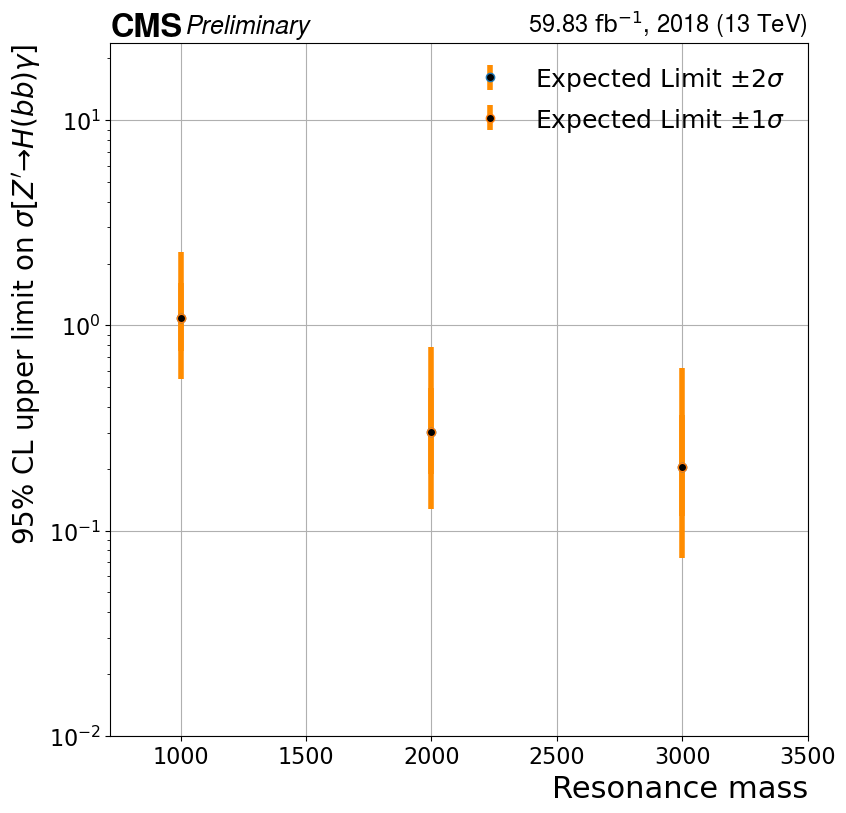

In [ ]:
plot_cross_section_limit(cross_section_limit=cross_section_limit, x_name='Resonance mass')